In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/final_dataset.csv')

In [3]:
df.head()

,Weight,Height,BMI,Gender,Age,BMIcase,Exercise Recommendation Plan
0,92.085190,1.760250,29.719488,Female,59,over weight,5
1,61.089124,1.595499,23.997776,Female,25,normal,4
2,82.454037,1.816538,24.987499,Female,50,normal,4
3,101.713306,1.790696,31.720047,Female,62,obese,6
4,99.609527,1.969726,25.673756,Male,57,over weight,5


In [4]:
df.describe()

,Weight,Height,BMI,Age,Exercise Recommendation Plan
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,79.760954,1.761265,25.900955,41.956000,4.823400
std,17.359682,0.129611,5.678326,14.030361,1.522589
min,50.002978,1.390171,12.791453,18.000000,1.000000
25%,64.705890,1.703790,21.501848,30.000000,4.000000
50%,79.536451,1.776202,26.314692,42.000000,5.000000
75%,95.102506,1.848437,30.741264,54.000000,6.000000
max,109.998871,1.979633,34.997098,65.000000,7.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Weight                        5000 non-null   float64
 1   Height                        5000 non-null   float64
 2   BMI                           5000 non-null   float64
 3   Gender                        5000 non-null   object 
 4   Age                           5000 non-null   int64  
 5   BMIcase                       5000 non-null   object 
 6   Exercise Recommendation Plan  5000 non-null   int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 273.6+ KB


In [6]:
df.isnull().sum()

,0
Weight,0
Height,0
BMI,0
Gender,0
Age,0
BMIcase,0
Exercise Recommendation Plan,0


In [7]:
from sklearn.model_selection import train_test_split
X = df.drop('Exercise Recommendation Plan', axis=1)  # Features
y = df['Exercise Recommendation Plan']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% test

In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Male'

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame

# Create a LabelEncoder object
encoder = LabelEncoder()

# Iterate through columns and encode object (string) types
for col in df.select_dtypes(include=['object']).columns:
    df[col] = encoder.fit_transform(df[col])

# Now proceed with your model training
X = df.drop('Exercise Recommendation Plan', axis=1)  # Features
y = df['Exercise Recommendation Plan']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # For classification
from sklearn.metrics import mean_squared_error, r2_score  # For regression

In [12]:
y_pred = model.predict(X_test)

In [14]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') # Added average='weighted'
recall = recall_score(y_test, y_pred, average='weighted') # Added average='weighted'
f1 = f1_score(y_test, y_pred, average='weighted') # Added average='weighted'

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.823
Precision: 0.8032776107476849
Recall: 0.823
F1-score: 0.8101777210609777


Descriptive Statistics:
            Weight       Height          BMI       Gender          Age  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     79.760954     1.761265    25.900955     0.501600    41.956000   
std      17.359682     0.129611     5.678326     0.500047    14.030361   
min      50.002978     1.390171    12.791453     0.000000    18.000000   
25%      64.705890     1.703790    21.501848     0.000000    30.000000   
50%      79.536451     1.776202    26.314692     1.000000    42.000000   
75%      95.102506     1.848437    30.741264     1.000000    54.000000   
max     109.998871     1.979633    34.997098     1.000000    65.000000   

           BMIcase  Exercise Recommendation Plan  
count  5000.000000                   5000.000000  
mean      3.315200                      4.823400  
std       1.653964                      1.522589  
min       0.000000                      1.000000  
25%       2.000000                      4.000000  
50%

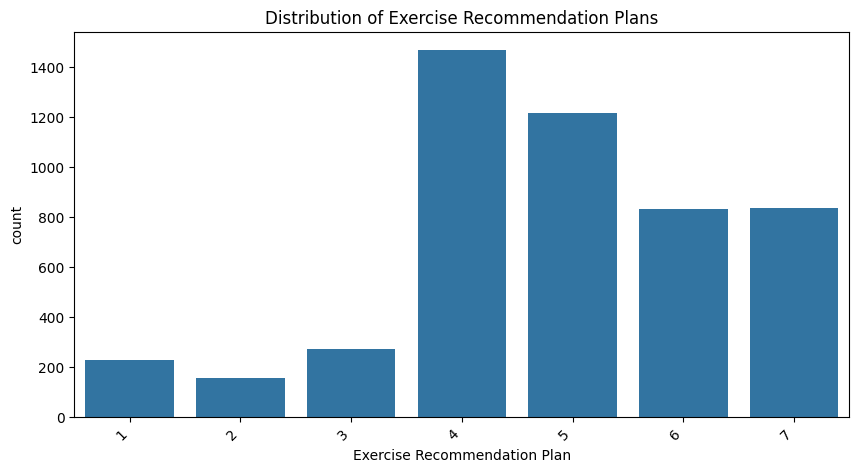

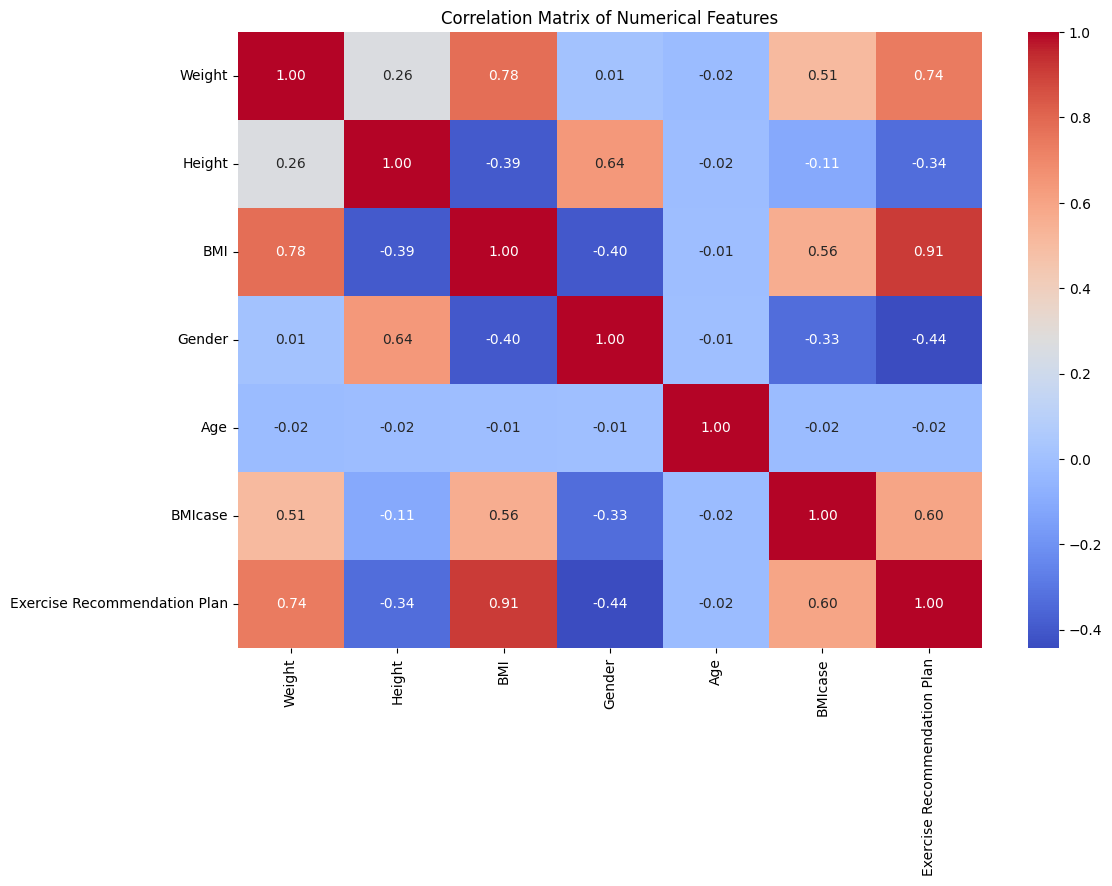

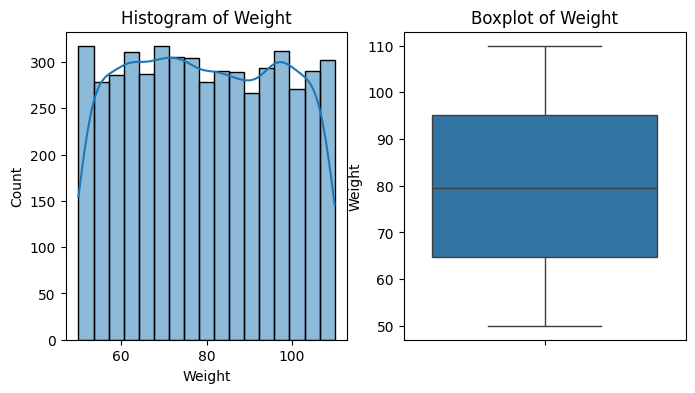

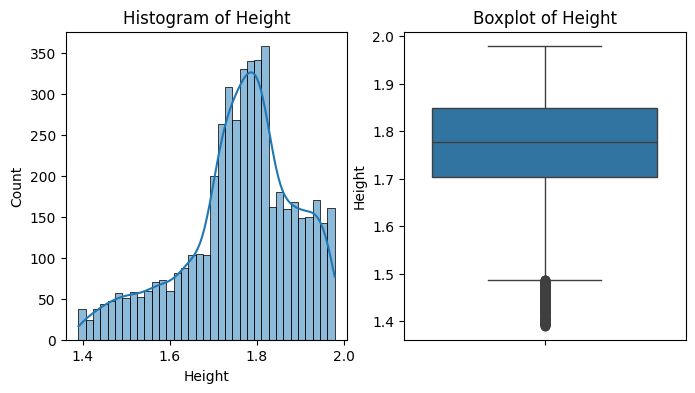

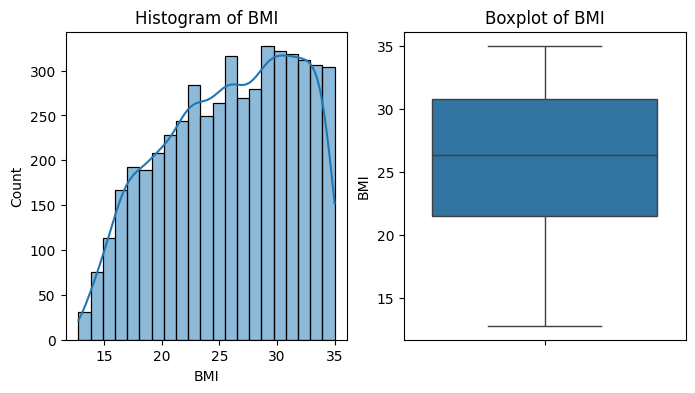

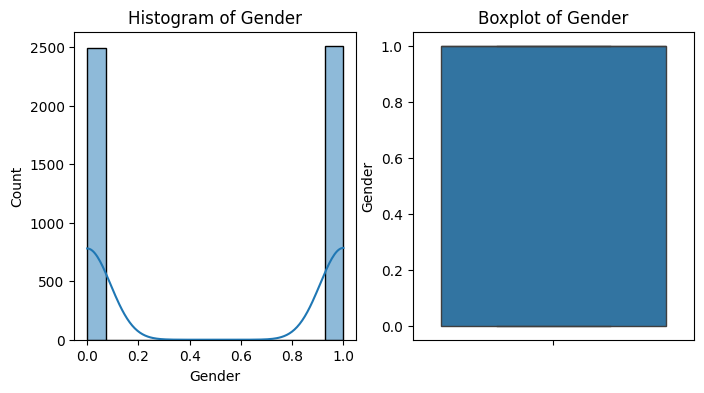

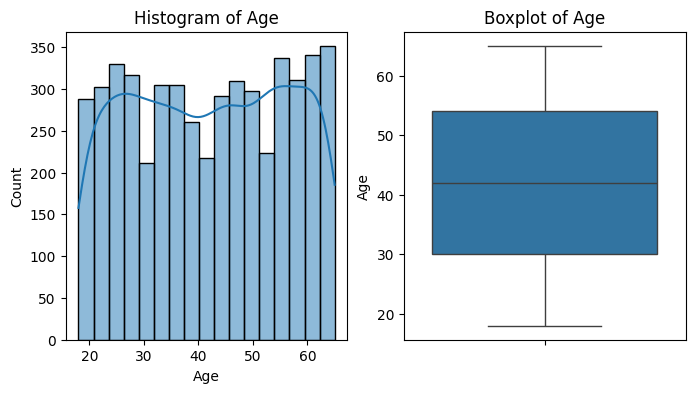

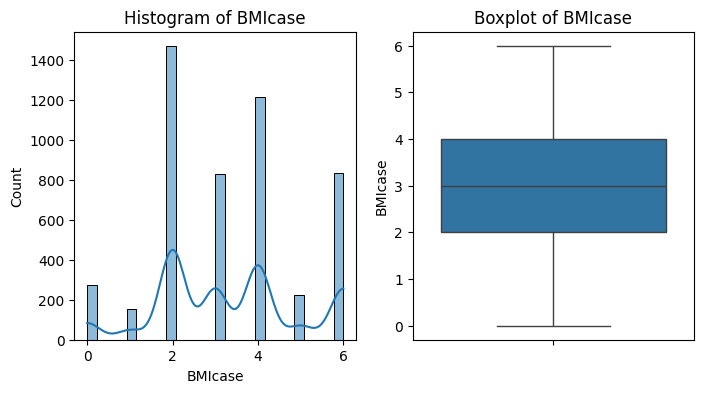

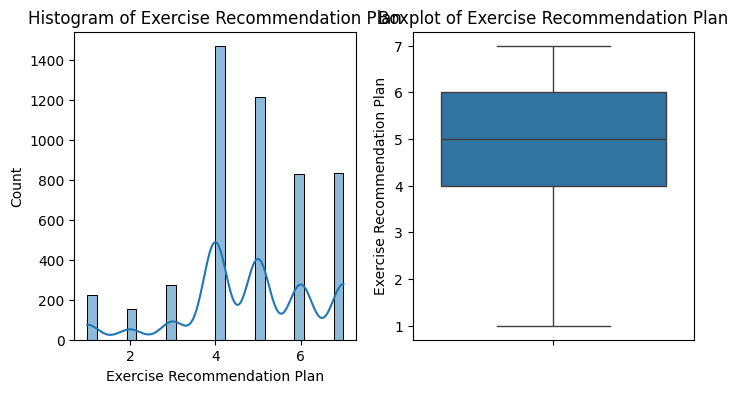

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is loaded into a DataFrame named 'df'
# df = pd.read_csv('/content/final_dataset.csv')

# 1. Descriptive Statistics
print("Descriptive Statistics:")
print(df.describe(include='all'))  # Include all columns, even categorical ones

# 2. Data Types and Missing Values
print("\nData Types and Missing Values:")
print(df.info())
print(df.isnull().sum())

# 3. Class Distribution (for the target variable)
print("\nClass Distribution (Exercise Recommendation Plan):")
print(df['Exercise Recommendation Plan'].value_counts())
plt.figure(figsize=(10, 5))
sns.countplot(x='Exercise Recommendation Plan', data=df)
plt.title('Distribution of Exercise Recommendation Plans')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

# 4. Correlation Analysis (for numerical features)
numerical_features = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 5. Univariate Analysis (Histograms and Boxplots)
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt